# Data Science and Business Analytics : The Sparks Foundation

# Task 2 : Prediction Using Unsupervised Machine Learning

# Author : Mohammad sayeed

# importing the dataset

In [13]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# reading the dataset

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Visualising the data

In [15]:
df.shape

(150, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
iris = pd.DataFrame(df)
iris_df = iris.drop(columns = ['Id' , 'Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding number of clusters

In [19]:
# elbow method

sum_of_square_in_cluster = []

cluster_range = range(1,15)
for k in cluster_range:
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(iris_df)
    sum_of_square_in_cluster.append(kmeans.inertia_)

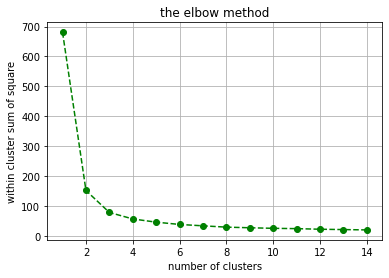

In [20]:
# plotting the within cluster sum of square vs number of clusters

plt.plot(cluster_range , sum_of_square_in_cluster , 'go--' , color='green')
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of square')
plt.grid()
plt.show()

# Applying kmeans clustering

In [23]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3 , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
predictions = model.fit_predict(iris_df)

# Visualising the cluster

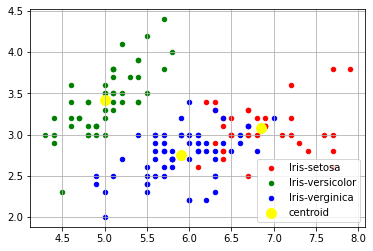

In [26]:
x = iris_df.iloc[: ,[0,1,2,3]].values
plt.scatter(x[predictions == 0,0] , x[predictions == 0,1] , s=20 , color = 'red' , label = 'Iris-setosa')
plt.scatter(x[predictions == 1,0] , x[predictions == 1,1] , s=20 , color = 'green' , label = 'Iris-versicolor')
plt.scatter(x[predictions == 2,0] , x[predictions == 2,1] , s=20 , color = 'blue' , label = 'Iris-verginica')

plt.scatter(model.cluster_centers_[: , 0] , model.cluster_centers_[: , 1] , s=100 , color='yellow' , label='centroid')
plt.legend()
plt.grid()
plt.show()